In [4]:
# Importing libraries and dependencies necessary for the project
import pandas as pd
import numpy as np

import yfinance as yf
import requests

import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
load_dotenv()
%matplotlib inline


In [5]:
cryptocurrencies = ['BTC-USD', 'ETH-USD','USDT-USD', 'BNB-USD']

indices = ["^GSPC", "DJI" , "NDAQ", "^RUT"]

In [6]:
# I want to analyze the Crypto Market during the Covid-19 Pandemic and the post Covid-19 Pandemic.
start_date_pandemic_lockdown = "2020-01-01"
end_date_pandemic_lockdown = "2021-04-28"

start_date_after_locksown = "2021-05-01"
end_date_after_lockdown = "2022-04-29"

crypto_data = yf.download(cryptocurrencies, start_date_pandemic_lockdown, end_date_pandemic_lockdown)
crypto_data.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                         Close  \
              BNB-USD      BTC-USD     ETH-USD  USDT-USD    BNB-USD   
Date                                                                  
2020-01-01  13.689083  7200.174316  130.802002  0.999836  13.689083   
2020-01-02  13.027011  6985.470215  127.410179  1.001565  13.027011   
2020-01-03  13.660452  7344.884277  134.171707  1.004192  13.660452   
2020-01-04  13.891512  7410.656738  135.069366  1.007472  13.891512   
2020-01-05  14.111019  7411.317383  136.276779  1.006197  14.111019   

                                                    High               ...  \
                BTC-USD     ETH-USD  USDT-USD    BNB-USD      BTC-USD  ...   
Date                                                                   ...   
2020-01-01  7200.174316  130.802002  0.999836  13.873946  7254.330566  ...   
2020-01-02  6985.470215  127.410179  1.001565  13.715548  7212.155273  ...   
2020-01-03  7344.884277  134.171707  1.004192  13.763709  7413.715332  ...   
2020-01-04  7410.656738  135.069366  1.007472  13.921914  7427.385742  ...   
2020-01-05  7411.317383  136.276779  1.006197  14.410801  7544.497070  ...   

                   Low                 Open                           \
               ETH-USD  USDT-USD    BNB-USD      BTC-USD     ETH-USD   
Date                                                                   
2020-01-01  129.198288  0.994924  13.730962  7194.892090  129.630661   
2020-01-02  126.954910  0.986515  13.698126  7202.551270  130.820038   
2020-01-03  126.490021  0.988027  13.035329  6984.428711  127.411263   
2020-01-04  133.040558  0.999160  13.667442  7345.375488  134.168518   
2020-01-05  135.045624  1.001758  13.888340  7410.451660  135.072098   

                         Volume                                         
            USDT-USD    BNB-USD      BTC-USD      ETH-USD     USDT-USD  
Date                                                                    
2020-01-01  0.999571  172980718  18565664997   7935230330  21503143454  
2020-01-02  0.999788  156376427  20802083465   8032709256  24212314977  
2020-01-03  1.001183  173683857  28111481032  10476845358  32420287856  
2020-01-04  1.003510  182230374  18444271275   7430904515  21585629320  
2020-01-05  1.009921  202552703  19725074095   7526675353  24090142146  

[5 rows x 24 columns]

The main advantage of adjusted closing prices is that they make it easier to evaluate stock performance. Firstly, the adjusted closing price helps investors understand how much they would have made by investing in a given asset.

In [7]:
closing_prices = crypto_data["Close"]
closing_prices.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

### As we can see from the graph above it is hard to compare the returns because they are on different price range


In [8]:
daily_returns=closing_prices.pct_change().dropna()
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## Volatilty
### Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.

In [9]:
daily_returns.describe()

,BNB-USD,BTC-USD,ETH-USD,USDT-USD
count,483.000000,483.000000,483.000000,483.000000
mean,0.009843,0.005039,0.007725,0.000012
std,0.067178,0.039758,0.051794,0.004918
min,-0.419046,-0.371695,-0.423472,-0.051212
25%,-0.017658,-0.011354,-0.016563,-0.000869
50%,0.004845,0.002788,0.006419,-0.000013
75%,0.032452,0.020514,0.033407,0.000996
max,0.697604,0.187465,0.259475,0.054845


In [10]:
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [11]:
cumulative_return = ((1 + daily_returns).cumprod() - 1) *100
cumulative_return.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

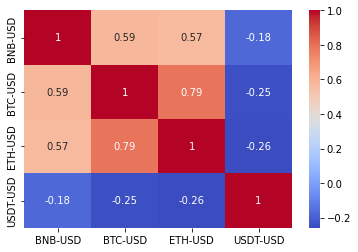

In [12]:
correlation = daily_returns.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [13]:
ma_20days = closing_prices['BTC-USD'].rolling(20).mean()
ma_20days.hvplot()

:Curve   [Date]   (BTC-USD)